In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.isnull().values.sum()

0

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

##### Checking the imbalnce data

In [9]:
df[df['Class'] == 1].shape,df[df['Class'] == 0].shape,

((492, 31), (284315, 31))

In [10]:
print(round((df[df['Class']==1].shape[0]/df.shape[0])*100,2,),"% Non-Fraud Transactions")

0.17 % Non-Fraud Transactions


In [11]:
print(round((df[df['Class']==0].shape[0]/df.shape[0])*100,2,),"% Non-Fraud Transactions")

99.83 % Non-Fraud Transactions


##### observations 
- this is highly imbalanced dataset
- Here only 492 records is fraud which is just 0.17% of Dataset

In [12]:
df_sample = df.sample(15000,random_state=42)

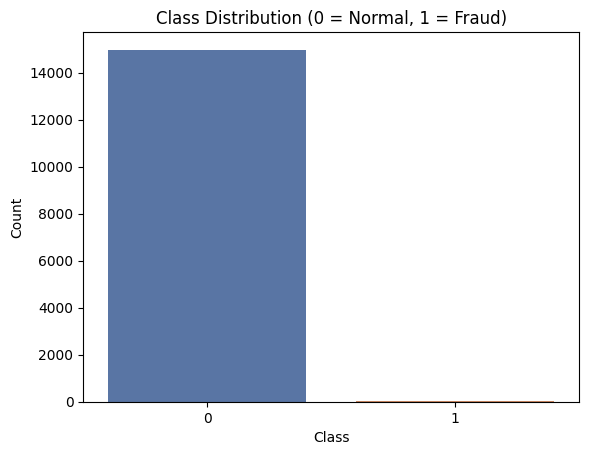

In [13]:
sns.countplot(x='Class', data=df_sample,palette='deep')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.show()

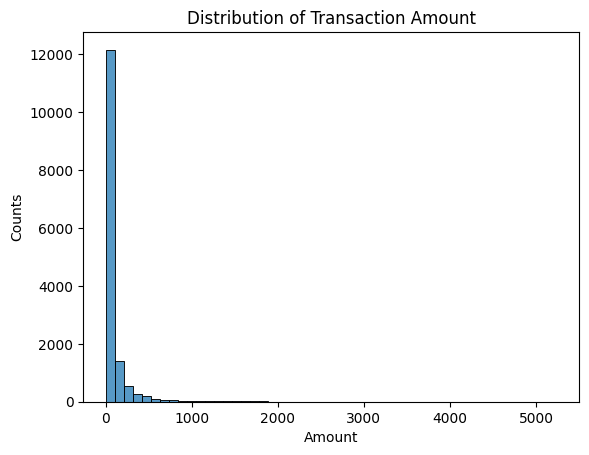

In [14]:
sns.histplot(df_sample['Amount'],bins=50)
plt.xlabel("Amount")
plt.ylabel("Counts")
plt.title("Distribution of Transaction Amount")
plt.show()

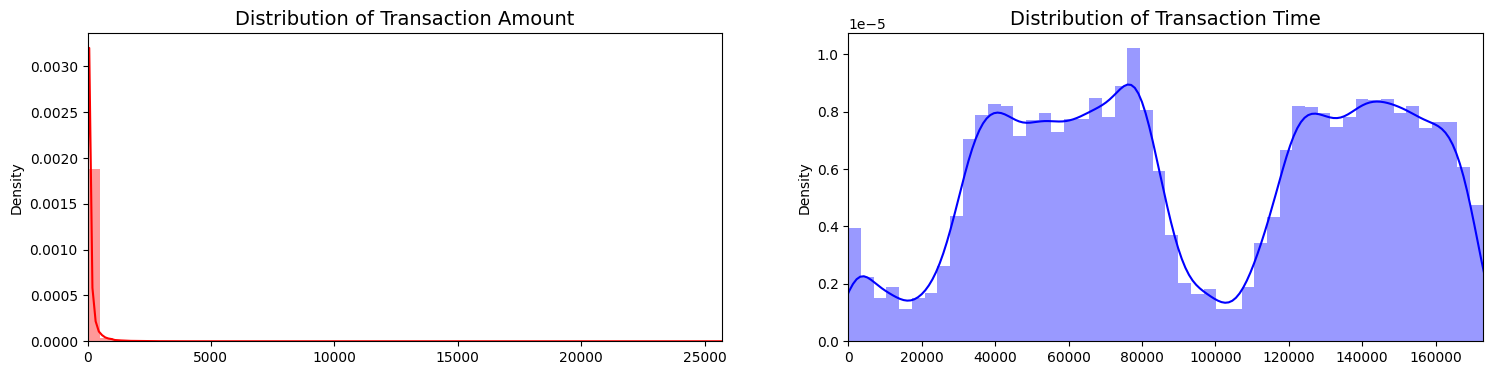

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['Amount'].values, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

sns.distplot(df['Time'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df['Time'].values), max(df['Time'].values)])

plt.show()

##### Scaling both Amount and Time column

In [16]:
from sklearn.preprocessing import RobustScaler

In [17]:
scaler = RobustScaler()

In [18]:
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [19]:
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [20]:
df.drop(columns=['Time','Amount'],inplace=True)

##### Spliting data

In [71]:
X = df.drop(columns=['Class'])
y = df['Class']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

##### StratifiedSplit

In [73]:
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit

In [74]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [25]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    og_Xtrain, og_Xtest = X.iloc[train_index], X.iloc[test_index]
    og_ytrain, og_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn into an array
original_Xtrain = og_Xtrain.values
original_Xtest = og_Xtest.values
original_ytrain = og_ytrain.values
original_ytest = og_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


#### NearMiss Undersampling

In [26]:
from collections import Counter
Counter(original_ytrain)

Counter({0: 227452, 1: 394})

In [31]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(n_neighbors=3,n_jobs=-1,sampling_strategy=0.8)

In [32]:
x_train_nm,y_train_nm = nm.fit_resample(original_Xtrain,original_ytrain)

print("Before :",Counter(original_ytrain))
print("After :",Counter(y_train_nm))

Before : Counter({0: 227452, 1: 394})
After : Counter({0: 492, 1: 394})


In [48]:
lr = LogisticRegression(max_iter=1000,class_weight='balanced')
lr.fit(x_train_nm,y_train_nm)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.5510963641789997
[[31296 25567]
 [    3    95]]


In [49]:
xgb = XGBClassifier()
xgb.fit(x_train_nm,y_train_nm)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.08238970523691648
[[ 4595 52268]
 [    0    98]]


`Observations`
- it is perform very bad because undersampling reduces data
- it is only useful when data is small

#### Oversampling

In [27]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [34]:
ros = RandomOverSampler(sampling_strategy=0.75)

In [35]:
x_train_os,y_train_os = ros.fit_resample(original_Xtrain,original_ytrain)

print("Before :",Counter(original_ytrain))
print("After :",Counter(y_train_os))

Before : Counter({0: 227452, 1: 394})
After : Counter({0: 227452, 1: 170589})


In [60]:
rf = RandomForestClassifier()
rf.fit(x_train_os,y_train_os)
y_pred = rf.predict(original_Xtest)

In [61]:
print(accuracy_score(original_ytest,y_pred))
print(confusion_matrix(original_ytest,y_pred))
print(classification_report(original_ytest,y_pred))

0.999350432752234
[[56863     0]
 [   37    61]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.62      0.77        98

    accuracy                           1.00     56961
   macro avg       1.00      0.81      0.88     56961
weighted avg       1.00      1.00      1.00     56961



#### SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(sampling_strategy=0.85,random_state=42,k_neighbors=3)

In [34]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [27]:
rf = RandomForestClassifier(
    n_estimators=100,class_weight='balanced',
    max_features='sqrt',criterion='gini',
    n_jobs=-1,random_state=42
)

In [28]:
rf.fit(X_train_smote,y_train_smote)
y_pred = rf.predict(X_test)

In [29]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9995669627705019
[[85289    18]
 [   19   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.86      0.86       136

    accuracy                           1.00     85443
   macro avg       0.93      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [45]:
(56862+70)/(56862+70+28+1)

0.999490879724724

#### Class Weights

In [35]:
from collections import Counter

In [36]:
Counter(y_train_smote)

Counter({0: 199008, 1: 169156})

In [37]:
class_weight = {0:1,1:1.3}

In [38]:
param_grid = {
    'l1_ratio':[0,0.5,1.0],
    'C':[0.01,0.1,1,10],
    'solver':['lbfgs','liblinear','saga']
}

In [39]:
clf = LogisticRegression(class_weight=class_weight,n_jobs=-1,random_state=42)

In [40]:
from sklearn.model_selection import RandomizedSearchCV
rcv = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=3
)

In [41]:
rcv.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,LogisticRegre...ndom_state=42)
,param_distributions,"{'C': [0.01, 0.1, ...], 'l1_ratio': [0, 0.5, ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,10
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [42]:
rcv.best_score_

0.923975492457086

In [43]:
rcv.best_params_

{'solver': 'liblinear', 'l1_ratio': 0.5, 'C': 10}

In [44]:
model = rcv.best_estimator_

In [45]:
model.fit(X_train_smote,y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{0: 1, 1: 1.3}"
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [46]:
y_pred = model.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9709865056236321
[[82837  2470]
 [    9   127]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.09       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



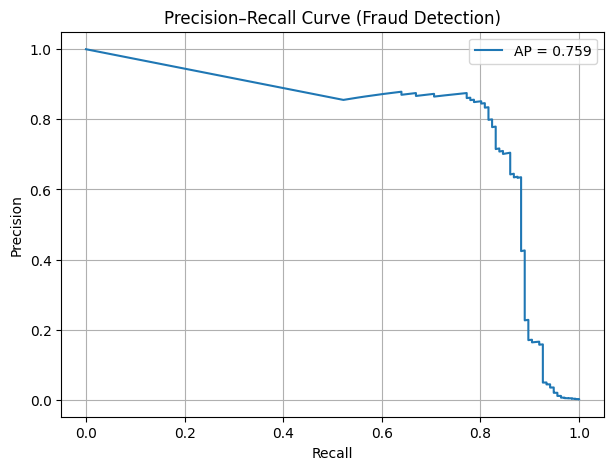

In [48]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Get predicted probabilities for fraud class
y_scores = model.predict_proba(X_test)[:, 1]

# 2. Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# 3. Average precision (single-number summary)
ap_score = average_precision_score(y_test, y_scores)

# 4. Plot
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'AP = {ap_score:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Fraud Detection)')
plt.legend()
plt.grid()
plt.show()


### XGBoost

In [75]:
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos
print(scale_pos_weight)

577.2893401015228


In [77]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=neg/pos,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [78]:
y_pred = xgb.predict(X_test)

In [79]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.999420656238479
[[56846    17]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.84      0.83        98

    accuracy                           1.00     56961
   macro avg       0.91      0.92      0.92     56961
weighted avg       1.00      1.00      1.00     56961



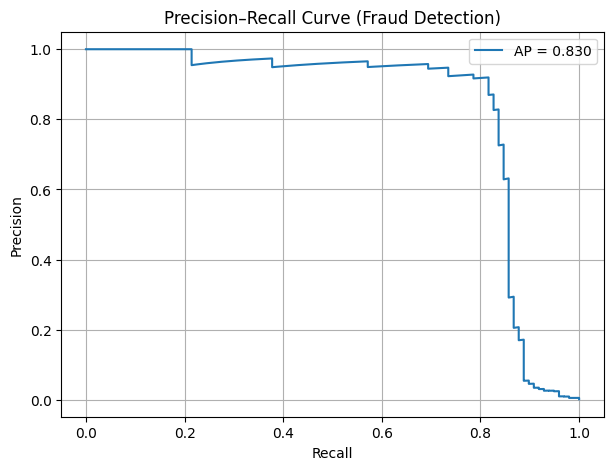

In [80]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Get predicted probabilities for fraud class
y_scores = xgb.predict_proba(X_test)[:, 1]

# 2. Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# 3. Average precision (single-number summary)
ap_score = average_precision_score(y_test, y_scores)

# 4. Plot
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'AP = {ap_score:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Fraud Detection)')
plt.legend()
plt.grid()
plt.show()
